In [ ]:
#installing tensorflow

In [ ]:
#!pip install tensorflow

In [ ]:
#Import all of used library in project

In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from PIL import Image
from collections import Counter
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import load_img, img_to_array
from io import BytesIO
import requests
import random
from tensorflow.keras.applications import MobileNetV2

2025-06-13 04:48:37.933623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749764918.039614    1609 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749764918.071778    1609 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749764918.215963    1609 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749764918.216048    1609 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749764918.216053    1609 computation_placer.cc:177] computation placer alr

In [ ]:
#import dataset from kaggle.com

In [ ]:
# !pip install kagglehub

In [3]:
os.getcwd()

'/mnt/c/Users/HERNANDES/Vs Code/Untitled Folder'

In [ ]:
# import kagglehub
# path_download = kagglehub.dataset_download("alessiocorrado99/animals10")
# print("Path to dataset files:", path_download)

In [4]:
mypath= '/mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/raw pictures/'

In [ ]:
#lable distribution

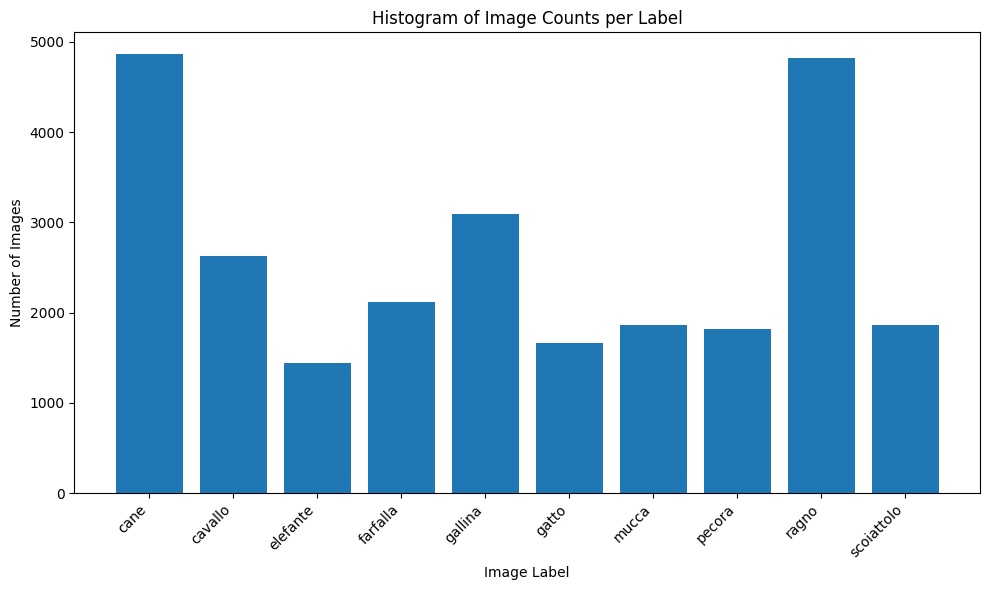

In [5]:
image_counts = {}
for cls in os.listdir(mypath):
    n_files = len(os.listdir(os.path.join(mypath, cls)))
    image_counts[cls] = n_files

plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel("Image Label")
plt.ylabel("Number of Images")
plt.title("Histogram of Image Counts per Label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Copy train image class to folder

In [6]:
selected_labels = ['pecora', 'gatto', 'farfalla']

selected_label_destination_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/train/'

os.makedirs(selected_label_destination_dir, exist_ok=True)

for cls in os.listdir(mypath):
    # Check if the class is one of the selected labels
    if cls in selected_labels:
        source_class_dir = os.path.join(mypath, cls)
        destination_class_dir = os.path.join(selected_label_destination_dir, cls)

        os.makedirs(destination_class_dir, exist_ok=True)

        for fname in os.listdir(source_class_dir):
            source_fpath = os.path.join(source_class_dir, fname)
            destination_fpath = os.path.join(destination_class_dir, fname)
            shutil.copy2(source_fpath, destination_fpath)

print(f"succesful copied image {selected_labels} to {selected_label_destination_dir}")

succesful copied image ['pecora', 'gatto', 'farfalla'] to mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/train/


In [ ]:
#open example image founded

Pictures found: 5600


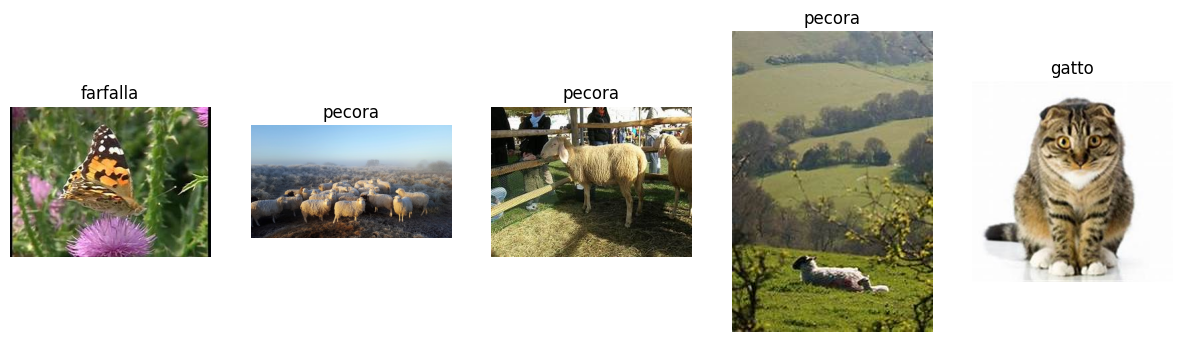

In [7]:
dataset_dir = selected_label_destination_dir

# Collect all of the images and labels files
image_files = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            label = os.path.basename(root)  # ambil nama folder sebagai label
            file_path = os.path.join(root, file)
            image_files.append((file_path, label))

print(f"Pictures found: {len(image_files)}")

# Take 5 random images
random_images = random.sample(image_files, 5)

# image show
plt.figure(figsize=(15, 5))
for i, (img_path, label) in enumerate(random_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(label)  # labels = folder name
    plt.axis('off')

plt.show()

In [ ]:
#Show total images perlabels

In [8]:
total_images = sum(len(files) for root, dirs, files in os.walk(selected_label_destination_dir) if root != selected_label_destination_dir)

image_counts_selected = {}
for label in selected_labels:
  label_dir = os.path.join(selected_label_destination_dir, label)
  if os.path.exists(label_dir):
    image_counts_selected[label] = len(os.listdir(label_dir))

print(f"Images from selected labels: {total_images}")
print("\nImages perlabels:")
for label, count in image_counts_selected.items():
  print(f"{label}: {count}")

Images from selected labels: 5600

Images perlabels:
pecora: 1820
gatto: 1668
farfalla: 2112


In [ ]:
#Resolution distribution from selected label

In [2]:
size_counter = Counter()
for cls in os.listdir(selected_label_destination_dir):
    for fname in os.listdir(os.path.join(selected_label_destination_dir, cls)):
        fpath = os.path.join(selected_label_destination_dir, cls, fname)
        try:
            with Image.open(fpath) as img:
                size_counter[img.size] += 1
        except:
            continue

# Show 5 commonly resolution
print("\nCommonly appeared resolution (top 5):")
for size, count in size_counter.most_common(5):
    print(f"{size}: {count} pictures")

# Ubah (width, height) jadi string label resolusi
res_labels = [f'{w}x{h}' for (w, h) in size_counter.keys()]
counts = list(size_counter.values())

plt.figure(figsize=(12, 6))
plt.bar(res_labels[:20], counts[:20], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Resolution (Width x Height)')
plt.ylabel('Picture total')
plt.title('20 commonly appeared resolution')
plt.show()

NameError: name 'selected_label_destination_dir' is not defined

In [ ]:
#Data preprocessing

In [ ]:
#Rezising image resolution

In [10]:
final_datasets_dir = selected_label_destination_dir
output_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/preprocess image/'

target_size = (224, 224) 

# Making output folder
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir, exist_ok=True)

# Preprocessing (resize + resaving)
for cls in tqdm(os.listdir(final_datasets_dir)):
    cls_input = os.path.join(final_datasets_dir, cls)
    cls_output = os.path.join(output_dir, cls)
    os.makedirs(cls_output, exist_ok=True)

    for fname in os.listdir(cls_input):
        fpath = os.path.join(cls_input, fname)
        try:
            with Image.open(fpath) as img:
                img = img.convert('RGB')       # makesure 3 channel
                img = img.resize(target_size)  # resize
                img.save(os.path.join(cls_output, fname))
        except:
            continue

print("Images rezised.")

100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:31<00:00, 50.64s/it]

Images rezised.


In [ ]:
#split dataset

In [11]:
# Split train/val/test
classes = os.listdir(output_dir)
train_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/train/'
val_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/val/'
test_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/test/'

for d in [train_dir, val_dir, test_dir]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(d, cls), exist_ok=True)

# Split data per kelas
for cls in classes:
    cls_path = os.path.join(output_dir, cls)
    files = os.listdir(cls_path)
    train_files, valtest_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(valtest_files, test_size=0.5, random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(train_dir, cls, f))
    for f in val_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(val_dir, cls, f))
    for f in test_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(test_dir, cls, f))

print("Dataset splited train/val/test.")

# 7️ (Optional) checking the total for each class
for split_dir in [train_dir, val_dir, test_dir]:
    print(f"\n📁 {split_dir}")
    for cls in os.listdir(split_dir):
        n_files = len(os.listdir(os.path.join(split_dir, cls)))
        print(f"  - {cls}: {n_files} images")

Dataset splited train/val/test.

📁 mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/train/
  - farfalla: 1478 images
  - gatto: 1167 images
  - pecora: 1274 images

📁 mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/val/
  - farfalla: 317 images
  - gatto: 250 images
  - pecora: 273 images

📁 mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/test/
  - farfalla: 317 images
  - gatto: 251 images
  - pecora: 273 images


In [ ]:
#Modeling

In [2]:
train_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/train/'
val_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/val/'
test_dir = 'mnt/c/Users/HERNANDES/Vs Code/Untitled Folder/test/'

In [3]:
# Siapkan data generator untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)   # Hanya rescale untuk validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical' # Karena 3 kelas
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 3919 images belonging to 3 classes.
Found 840 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications import VGG16

In [5]:
## Load pretrained VGG16 tanpa FC layer
base_model = VGG16(weights='imagenet', include_top=True, input_shape=None)

# Ambil output layer tengah (misalnya block4_pool)
x = base_model.get_layer('block4_pool').output   

# Lanjutkan dengan Conv2D & Pooling sendiri
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Global average pooling + classifier head
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Model final
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

I0000 00:00:1749764962.834449    1609 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:07:00.0, compute capability: 7.5


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 114s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,783,907 (29.69 MB)

 Trainable params: 7,783,907 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
labels = train_generator.class_indices.keys()
print(labels)

dict_keys(['farfalla', 'gatto', 'pecora'])


In [ ]:
#Model compiling

In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
#Setup callback

In [10]:
# # Callback untuk stop saat akurasi > 95%
# class CustomEarlyStopping(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         train_acc = logs.get('accuracy')
#         val_acc = logs.get('val_accuracy')
#         if train_acc >= 0.95 and val_acc >= 0.95:
#             print("\n🎉 Train & Val Accuracy di  95%, training berhenti!")
#             self.model.stop_training = True

# early_stop = EarlyStopping(
#     monitor='accuracy',       # Metrik yang dipantau (bisa juga 'val_accuracy')
#     patience=5,               # Jumlah epoch yang ditunggu tanpa perbaikan
#     verbose=1,                # Tampilkan pesan saat training dihentikan
#     restore_best_weights=True # Kembalikan bobot terbaik (opsional, tapi disarankan)
# )

# # ModelCheckpoint: simpan hanya best model (val_accuracy terbaik)
# checkpoint = ModelCheckpoint(
#     'best_model.h5',        
#     monitor='val_accuracy',    
#     mode='max',
#     save_best_only=True,       
#     verbose=1
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=5,
#     min_lr=1e-7,
#     verbose=1
# )

# # Gabungkan callbacks
# # callbacks = [CustomEarlyStopping(), checkpoint,reduce_lr]
# callbacks = [checkpoint, reduce_lr, early_stop]

In [ ]:
# Model training

In [11]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[earlystopping]
)

/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1749765759.024204    1716 service.cc:152] XLA service 0x76c62c003d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749765759.024471    1716 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-06-13 05:02:39.189916: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749765759.929488    1716 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-13 05:02:40.951754: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.33 = (f32[16,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,224,224]{3,2,1,0} %bitcast.7459, f32[64,3,3,3]{3,2,1,0} %bitcast.7466, f32[64]{0} %bitcast.8443), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target

219/244 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.3577 - loss: 1.3847

2025-06-13 05:04:00.336491: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.33 = (f32[15,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[15,3,224,224]{3,2,1,0} %bitcast.7459, f32[64,3,3,3]{3,2,1,0} %bitcast.7466, f32[64]{0} %bitcast.8443), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-13 05:04:00.400306: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3586 - loss: 1.3612

2025-06-13 05:04:22.603910: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.33 = (f32[16,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,224,224]{3,2,1,0} %bitcast.757, f32[64,3,3,3]{3,2,1,0} %bitcast.764, f32[64]{0} %bitcast.766), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-13 05:04:22.690366: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc

244/244 ━━━━━━━━━━━━━━━━━━━━ 117s 402ms/step - accuracy: 0.3586 - loss: 1.3604 - val_accuracy: 0.3786 - val_loss: 1.0944
Epoch 2/50
  1/244 ━━━━━━━━━━━━━━━━━━━━ 46s 190ms/step - accuracy: 0.5625 - loss: 1.0597

/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5625 - loss: 1.0597 - val_accuracy: 0.3762 - val_loss: 1.0955
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 76s 311ms/step - accuracy: 0.3759 - loss: 1.0965 - val_accuracy: 0.3762 - val_loss: 1.0941
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3750 - loss: 1.1190 - val_accuracy: 0.3762 - val_loss: 1.0940
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 76s 309ms/step - accuracy: 0.3622 - loss: 1.0979 - val_accuracy: 0.3762 - val_loss: 1.0940
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.3750 - loss: 1.1047 - val_accuracy: 0.3774 - val_loss: 1.0939
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 74s 304ms/step - accuracy: 0.3721 - loss: 1.0941 - val_accuracy: 0.3774 - val_loss: 1.0940
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.3750 - loss: 1.0928 - val_accuracy: 0.3750 - val_loss: 1.0943
Epoch 9/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 78s 317ms/step - accuracy: 0.3882 - loss: 1.0919 - val_accurac

In [ ]:
# Evaluate and visualization

In [12]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important: Do not shuffle for evaluation
)

print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 841 images belonging to 3 classes.

Evaluating the model on the test set...


2025-06-13 05:23:27.477742: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.33 = (f32[32,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %bitcast.757, f32[64,3,3,3]{3,2,1,0} %bitcast.764, f32[64]{0} %bitcast.766), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-13 05:23:27.591435: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc

26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7369 - loss: 1.0305

2025-06-13 05:23:45.389818: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.33 = (f32[9,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,3,224,224]{3,2,1,0} %bitcast.757, f32[64,3,3,3]{3,2,1,0} %bitcast.764, f32[64]{0} %bitcast.766), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-13 05:23:45.469966: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:5

27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 599ms/step - accuracy: 0.7112 - loss: 1.0350
Test Loss: 1.0939
Test Accuracy: 0.3769


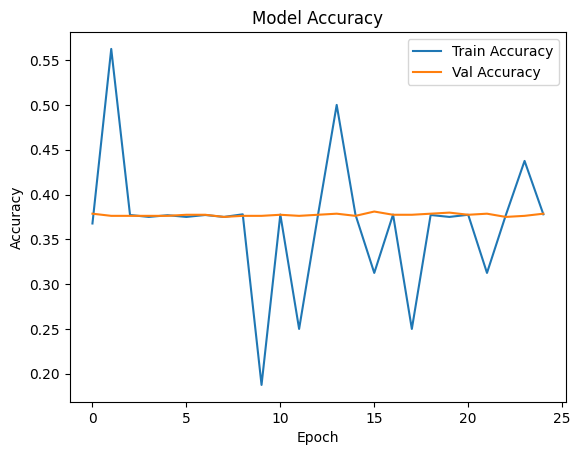

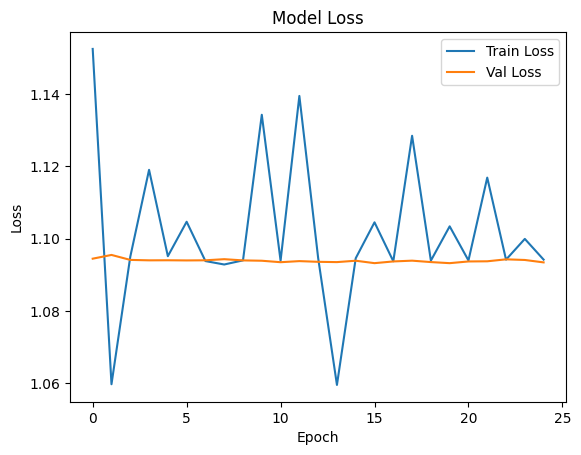

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save Model

In [14]:
model.save('animal_model.h5')
print("Model Saved")

Model Saved


In [ ]:
# Model prediction

In [87]:
# Parameters
input_size = (224,224)

#define input shape
channel = (3, )
input_shape = input_size + channel

#define labels
labels = ['pecora', 'gatto', 'farfalla']

In [ ]:
#define preprocess function

In [88]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
# Load Model

In [89]:
from tensorflow.keras.models import load_model

In [90]:
MODEL_PATH = load_model('animal_model.h5')

In [91]:
MODEL_PATH.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,783,909 (29.69 MB)

 Trainable params: 7,783,907 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Read Image

In [92]:
im = Image.open('download.jpeg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [93]:
model.predict(im)
im.show()
print( labels[np.argmax(y)], np.max(y) )

ValueError: Unrecognized data type: x=<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x76C630A22E10> (of type <class 'PIL.JpegImagePlugin.JpegImageFile'>)

In [85]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("animal_model.h5")

    # image path
    img_path = 'download.jpeg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


In [95]:
from keras.models import load_model
from keras.preprocessing import image
# Load inference layer
 model = load_model"animal_model.h5"

# Load gambar dari URL
url = 'download.jpeg'
img = Image.open(BytesIO(response.content)).convert('RGB')

# Preprocessing
img_resized = img.resize((224, 224))
img_array = img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Inference
predictions = inference_layer(img_array)

# Cek output keys
print("Output keys:", predictions.keys())

# Ambil output key yang ada
# Misal key output: 'output_0' atau 'predictions' atau lainnya
output_key = list(predictions.keys())[0]  # ambil key pertama
pred_array = predictions[output_key].numpy()[0]  # ambil array dan batch 0

# Ambil index prediksi dan label
predicted_index = np.argmax(pred_array)
class_names = ['Sheep', 'Cat', 'Butterfly']  
predicted_label = class_names[predicted_index]

# Cetak hasil
print(f"Prediksi index: {predicted_index}")
print(f"Prediksi label: {predicted_label}")
print(f"Confidence: {pred_array[predicted_index]:.4f}")

# Visualisasi
plt.imshow(img)
plt.title(f"Prediksi: {predicted_label} ({pred_array[predicted_index]:.2f})")
plt.axis('off')
plt.show()

IndentationError: unexpected indent (4083410737.py, line 4)